In [1]:
import os
import sys

_path = os.path.abspath('../')
if _path not in sys.path:
    sys.path.append(_path)

from pathlib import Path
import requests

from astropy.constants import c as speed_of_light
import astropy.coordinates as coord
from astropy.io import fits
import astropy.table as at
from astropy.time import Time
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.interpolate import InterpolatedUnivariateSpline

from astropy.nddata import StdDevUncertainty
from specutils.spectra import Spectrum1D

from hq.samples_analysis import extract_MAP_sample

os.environ['APOGEE_CACHE_PATH'] = '/mnt/ceph/users/apricewhelan/apogee'
from subframe.data import Visit
from subframe.config import sdss_auth, plot_path, allstar_path, allvisit_path
from subframe.log import logger
from subframe.velocity import (normalize_ref_to_frame, cross_correlate, 
                               estimate_kernel, bag_of_hacks_cross_correlate,
                               shift_and_interpolate)
from subframe.utils import parabola_optimum
from subframe.plot import plot_spectrum_masked, plot_visit_frames, plot_normalized_ref_spectrum
from subframe.data_helpers import apply_masks

# logger.setLevel(1)

In [2]:
allstar = at.Table.read(allstar_path, hdu=1)
allvisit = at.Table.read(allvisit_path, hdu=1)

In [32]:
apid = '2M07273995+2420118'  # HAT-P-20

star = allstar[allstar['APOGEE_ID'] == apid]
visits_tbl = allvisit[allvisit['APOGEE_ID'] == apid]
len(visits_tbl)

7

In [33]:
visits = []
for row in visits_tbl:
    visit = Visit(row)
    frames = visit.frame_hdulists
    if frames is not None:
        visits.append(visit)
len(visits)

7

In [34]:
spectra = {}
for visit in visits:
    frame_spectra = visit.get_frame_spectra(True)
    spectra.update(frame_spectra)
len(spectra)

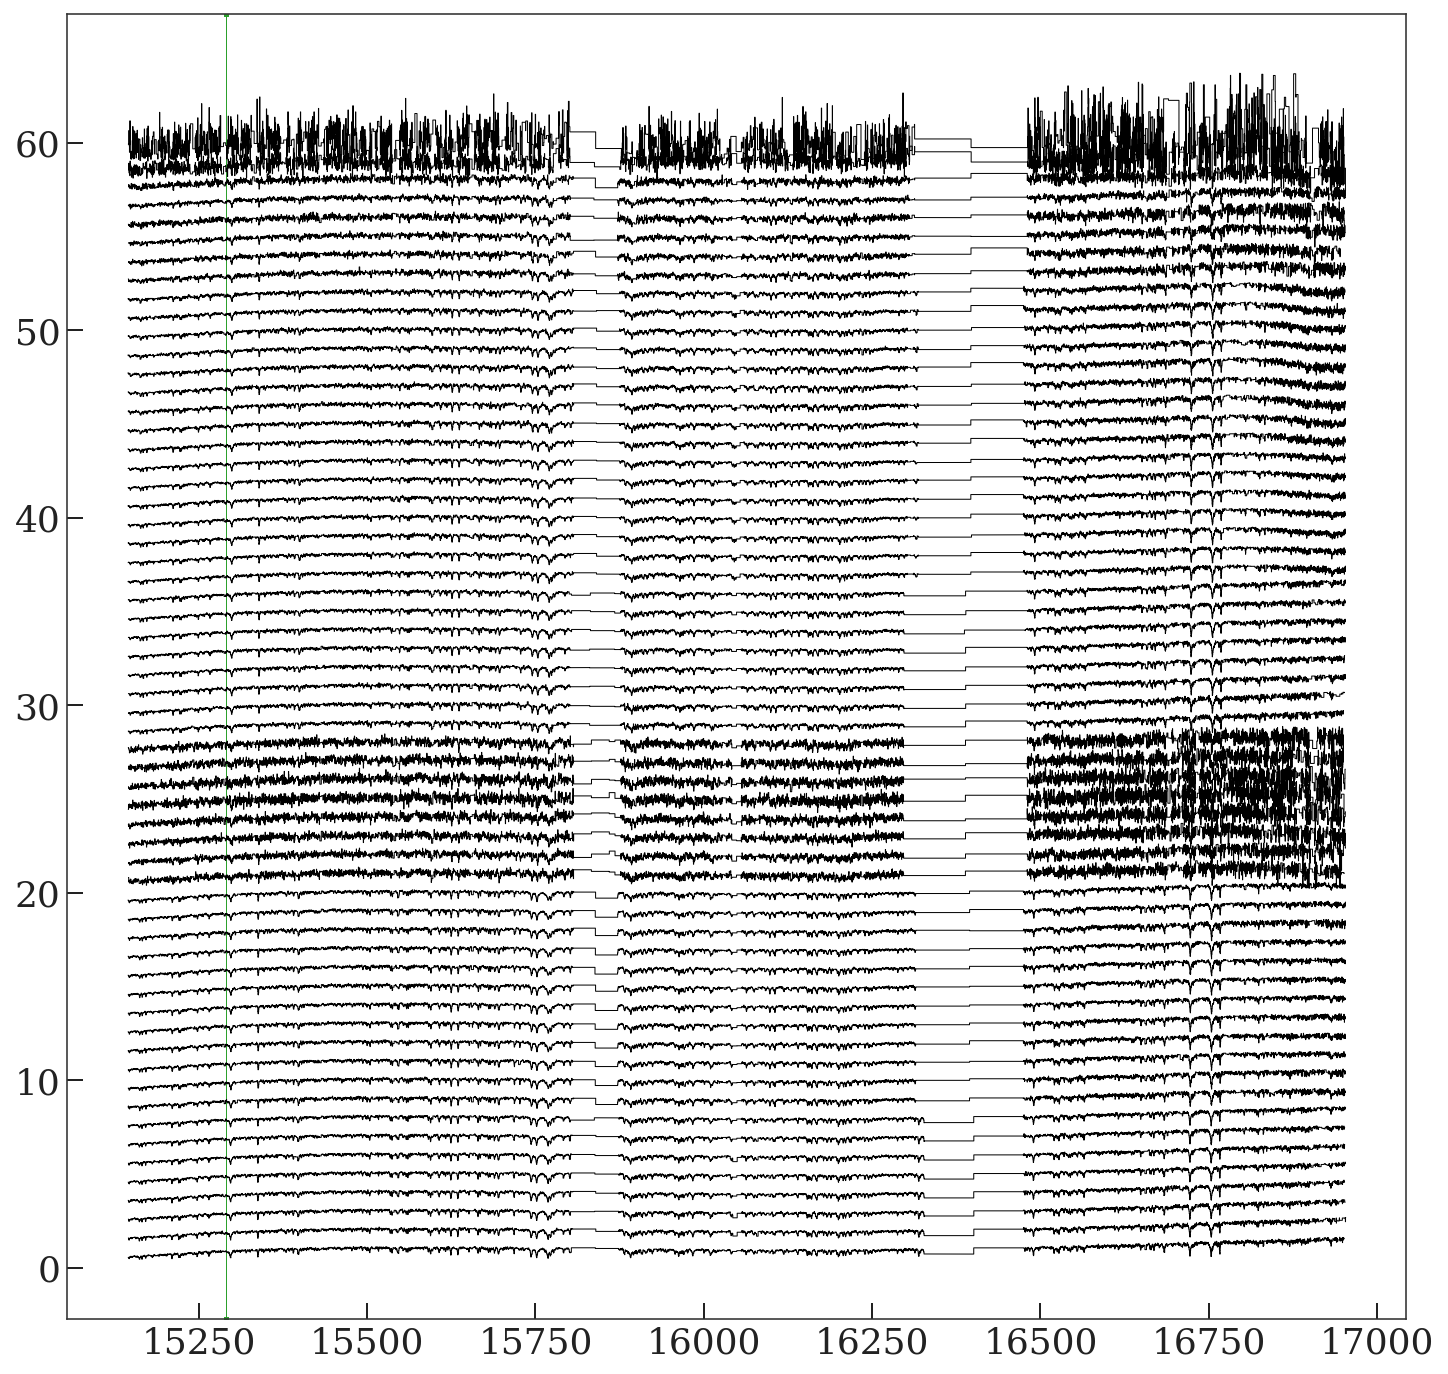

In [38]:
plt.figure(figsize=(12, 12))

for i, k in enumerate(sorted(list(spectra.keys()))):
    s = spectra[k]
    plt.plot(s.wavelength[~s.mask], 
             s.flux[~s.mask] / np.median(s.flux[~s.mask]) + i, 
             marker='', lw=0.5, 
             drawstyle='steps-mid', color='k')
plt.axvline(15290, alpha=0.5, zorder=-10, lw=0.5, color='tab:green')

In [39]:
tbl = at.Table()

for i, k in enumerate(sorted(list(spectra.keys()))):
    s = spectra[k]
    
    print(s.wavelength.shape)

(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
(6144,)
